# Topic Modeling of Revs

In [1]:
import pandas as pd
from IPython.display import display
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import seaborn as sns
%matplotlib inline
from gensim import corpora, models, matutils
from collections import defaultdict
from sklearn.feature_extraction import text

In [2]:
# import clean revs data

revs_df = pd.read_csv('/Users/caitlinmowdy/Desktop/DSI-SF-2-caitlinmowdy/capstone-hostelworld/clean-data/clean_revs_en_oct5.csv')
display(revs_df.shape, revs_df.head(2))

(21675, 14)

,Unnamed: 0,Unnamed: 0.1,text,user_id,rev_date,score,hostel,location,link,country,city,day,month,year
0,0,0,excellent value,1189474,30th Jun 2004,7.7,Fortuna Botel,"Budapest, Hungary",http://www.hostelworld.com/hosteldetails.php/F...,Hungary,Budapest,30,6,2004
1,1,1,i had a great time there because of the beach ...,1595059,23rd Dec 2004,7.7,Equity Point Sea,"Barcelona, Spain",http://www.hostelworld.com/hosteldetails.php/E...,Spain,Barcelona,23,12,2004


In [3]:
cv = CountVectorizer(ngram_range=(1,2), max_features=2500,binary=True)#max_features=2500
words = cv.fit_transform(revs_df.text).todense()

words = pd.DataFrame(words, columns=cv.get_feature_names())

# words.groupby(words.columns)

In [835]:
# these are words I've decided to add to my stop words through a process of trial and error

stop_wrds = ['hostel','hostels','customer','ive','comment','nice','place','did','10','min', 'youre',
             'minutes','friendly','bit','minute','think','know','im','sure','great','temple','nights',
             'really','stayed','hotel','like','just','didnt','id','ok','stay','dont','ve','light','red',
             'wasnt','definitely','best','good','didn','don']

In [836]:
# make a list my_stop_words with english stop words and new stop words

my_stop_words = text.ENGLISH_STOP_WORDS.union(stop_wrds) #,stop_noise, stop_nums, stop_top)

In [845]:
vectorizer = CountVectorizer(ngram_range=(2,2), max_features=2500, binary=True, 
                             stop_words=my_stop_words, min_df=.00008, max_df=.005)

X = vectorizer.fit_transform(revs_df.text).todense()

vocab2 = {v: k for k, v in vectorizer.vocabulary_.iteritems()}


In [856]:
lda2 = models.LdaModel(
    num_topics  =  10,
    passes      =  2,
    id2word     =  vocab2
    )

lda2.print_topics(num_topics=10, num_words=5)

[(0,
  u'0.001*helpful arrived + 0.001*toilets dirty + 0.001*speaks english + 0.001*new friends + 0.001*street walk'),
 (1,
  u'0.001*staff attentive + 0.001*hard sleep + 0.001*went way + 0.001*straight away + 0.001*shower toilet'),
 (2,
  u'0.001*central location + 0.001*bed shower + 0.001*showers floor + 0.001*water room + 0.001*extra mile'),
 (3,
  u'0.001*room locked + 0.001*hope soon + 0.001*station short + 0.001*kitchen location + 0.001*rooms lot'),
 (4,
  u'0.001*party night + 0.001*extremely noisy + 0.001*room rooms + 0.001*answer questions + 0.001*bathrooms cleaned'),
 (5,
  u'0.001*restaurant bar + 0.001*helpful pleasant + 0.001*loved staying + 0.001*clean free + 0.001*atmosphere quiet'),
 (6,
  u'0.001*wait long + 0.001*helpful feel + 0.001*fantastic helpful + 0.001*quite clean + 0.001*rooms way'),
 (7,
  u'0.001*night long + 0.001*couple days + 0.001*old house + 0.001*breakfast amazing + 0.001*downside location'),
 (8,
  u'0.001*night staff + 0.001*credit card + 0.001*room 

In [929]:
bow = []
blank_documents = 0

for document in X.tolist():

    single_document = []

    for token_id, token_count in enumerate(document):
        
        if token_count > 0:
              single_document.append((token_id, token_count))
            
    if len(single_document)>0:
        bow.append(single_document)
    else:
        blank_documents += 1
        bow.append([])

In [934]:
# create a dataframe of probabilites by topics 

topic_proba =lda2.get_document_topics(bow)

simplelist =[]
for x in topic_proba:
    simplelist.append(x)

# list of lists , inner list, each one should be only 10 (topic numbers) values (non-tuples)
valuelist = [[y[1] for y in line] for line in simplelist]

topicdf_nomax = pd.DataFrame(valuelist, columns = ['t1','t2','t3','t4','t5','t6','t7','t8','t9','t10'])

In [937]:
topicdf_nomax.shape

(21675, 10)

In [946]:
# create new columns to topic porb dataframe for the sum of topic prob and max topic probabitliyt for every document

columns = ['t1','t2','t3','t4','t5','t6','t7','t8','t9','t10']
topicdf_nomax['sum_prob'] =  topicdf_nomax[columns].apply(np.sum, axis=1)
topicdf_nomax['max_prob'] =  topicdf_nomax[columns].apply(np.max, axis=1)

In [950]:
topicdf_nomax['max_prob'].describe()

count    21675.000000
mean         0.471411
std          0.320506
min          0.100000
25%          0.100000
50%          0.549836
75%          0.774930
max          0.957131
Name: max_prob, dtype: float64

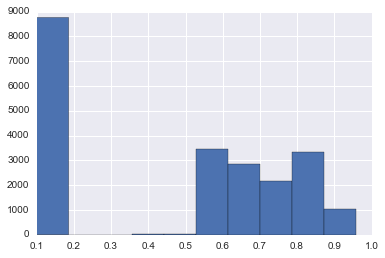

In [949]:
# hist of max topic prob for each document in revs_df
topicdf_nomax['max_prob'].hist()

In [ ]:
import seaborn as sns

doc_topics = [lda2.get_document_topics(doc) for doc in bow]

doc_topic_probabilities = []

for document in doc_topics:
    
    single_document = []
    
    for topic, probablity in document:
        
        single_document.append(probablity)
        
    doc_topic_probabilities.append(single_document)
    
docs_topics = pd.DataFrame(doc_topic_probabilities)
sns.heatmap(docs_topics)

# doc_topics
# doc_topic_probabilities

In [263]:
docs_topics.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.013333,0.013333,0.013333,0.013333,0.013333,0.013333,0.013333,0.013333,0.013333,0.346667,...,0.013333,0.013333,0.013333,0.013333,0.013333,0.013333,0.346667,0.013333,0.013333,0.013333
1,0.054524,0.051940,0.847221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,...,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.520000,0.020000,0.020000,0.020000
3,0.414784,0.470216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.286892,0.186649,0.089549,0.037387,0.054380,0.270040,0.047412,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# revs_words = revs_clean_df + top_words
rev_w_words = pd.concat([revs_clean_df, top_words], axis=1)

In [315]:
#                                old Work 

# find most commor words in revs from like df 

cv_like = CountVectorizer(ngram_range=(1,3), binary=True, stop_words='english')#, max_features=2500
words_like = cv_like.fit_transform(revs_like_df.text).todense()

# use the counter option to get the most common words. 
# Count the most common tokens 

summaries = "".join(revs_like_df['text'])
like_summaries = cv_like.build_analyzer()(summaries)
like_vocab = Counter(like_summaries).most_common(40)
like_vocab = pd.DataFrame(like_vocab)
like_vocab.columns=['word','count']

# find most commor words in revs from dis df 

cv_dis = CountVectorizer(ngram_range=(1,3), binary=True, stop_words='english')#, max_features=2500
words_dis = cv_dis.fit_transform(revs_dis_df.text).todense()

summaries = "".join(revs_dis_df['text'])
dis_summaries = cv_dis.build_analyzer()(summaries)
dis_vocab = Counter(dis_summaries).most_common(40)
dis_vocab = pd.DataFrame(dis_vocab)
dis_vocab.columns = ['word','count']

# find which words are most common in like and dislike subsets
# add them to a list to add to stop words

revs_vocab = like_vocab.append(dis_vocab)
revs_vocab.columns = ['word','count']
rev_vocab = revs_vocab.groupby(['word'])[['count']].count()
stop_noise = list(rev_vocab[rev_vocab['count'] == 2].index)

# remove uni code

def no_uni(value):
    return value.decode('unicode_escape').encode('ascii','ignore')

stop_noise=[no_uni(i) for i in stop_noise]

# find the most common words over all 

cv = CountVectorizer(ngram_range=(1,2), binary=True, stop_words='english')#max_features=2500
words = cv.fit_transform(revs_df.text).todense()


summaries = "".join(revs_df['text'])
summaries = cv.build_analyzer()(summaries)
vocab = Counter(summaries).most_common(40)
vocab = pd.DataFrame(vocab)
vocab.columns = ['word','count']

# add to list and remove uni code

stop_top = list(vocab['word'].values)
stop_top = [no_uni(i) for i in stop_top]